In [6]:
import sys
sys.path.append("..")

import torch
import numpy as np

from src.data import load_cora
from src.features.cora_feature import split
from src.models import train_cora
from src.models.mlp_graph import MLPGraph

In [7]:
# reproducibility
random_seed = 123
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

## Load the Dataset

In [8]:
graph, _, num_outputs = load_cora.load()
num_inputs = graph.num_nodes
graph

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

### Split the data into train, validation, and test

In [9]:
graph = split(graph)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
training samples 1895
validation samples 542
test samples 271


## Training & Result

Can run on GPU (cuda:0)

Pre-training prepare
	Run on: cuda:0
	Optimizer with 0.001 leraning rate and 0.0005 weight_dacay

Begin to train:
	Epoch: 1, Training Loss: 1.9209891557693481, Validation Score: 0.28966790437698364, Test Score: 0.28413283824920654
	Epoch: 10, Training Loss: 1.8871080875396729, Validation Score: 0.29520294070243835, Test Score: 0.28413283824920654
	Epoch: 20, Training Loss: 1.8226646184921265, Validation Score: 0.3044280409812927, Test Score: 0.2988929748535156
	Epoch: 30, Training Loss: 1.7138746976852417, Validation Score: 0.35424354672431946, Test Score: 0.3468634784221649
	Epoch: 40, Training Loss: 1.5508099794387817, Validation Score: 0.4428044259548187, Test Score: 0.45018449425697327
	Epoch: 50, Training Loss: 1.3467909097671509, Validation Score: 0.5110701322555542, Test Score: 0.5166051387786865
	Epoch: 60, Training Loss: 1.1349865198135376, Validation Score: 0.553505539894104, Test Score: 0.5498154759407043
	Epoch: 70, Training Loss: 0.9343432784080505

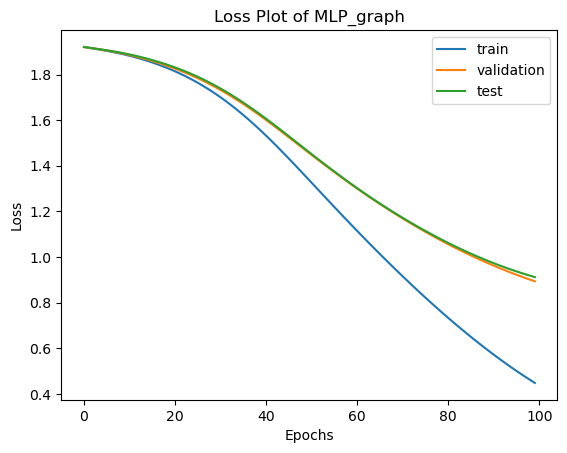

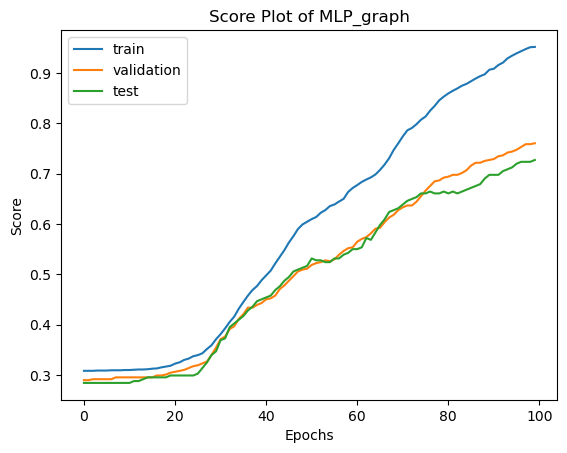

In [10]:
device = train_cora.GPU()
model = MLPGraph(num_inputs = num_inputs, num_outputs = num_outputs, seed = random_seed)
criterion = torch.nn.CrossEntropyLoss()
train_cora.start_train(model, graph, criterion, model_name = "MLP_graph", device = device)